The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


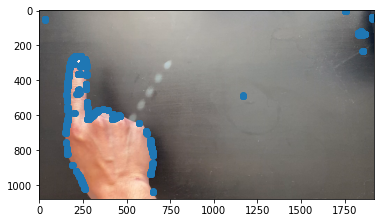

In [3]:
import skvideo.io
import matplotlib.pyplot as plt
from tracker import Tracker
from IPython import display
import time
from matplotlib import animation
%load_ext autoreload
%autoreload 2

video = skvideo.io.vread('../../data/up_move_right.mp4')

vectors = [t for t in Tracker(video)]

In [ ]:
for i, t in enumerate(vectors):
    plt.gca().clear()
    plt.imshow(video[i])
    plt.quiver(t[:,1], t[:,0], t[:,3], t[:,2], color='red', scale_units='xy', scale=1, angles='xy' )
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.01)

In [11]:
figsize=(10,10)
fig, ax = plt.subplots(figsize=figsize)
img = ax.imshow(video[0])
print(vectors[0][:,0])
def animate(frame_no, img, vectors, ax):
    img.set_data(video[frame_no])
    quiv = ax.quiver(vectors[frame_no][:,1], vectors[frame_no][:,0], vectors[frame_no][:,2], vectors[frame_no][:,3], color='red', scale_units='xy', scale=1, angles='xy' )
    return [img, quiv]
ani = animation.FuncAnimation(fig, animate, range(len(vectors)), interval=50, blit=True, fargs=(img, vectors, ax))
mywriter = animation.FFMpegWriter(fps = 20,extra_args=['-threads', '30'])
ani.save("test.mp4",writer=mywriter)

[   0.    0.    0. ... 1038. 1038. 1039.]
